Portland Data Group Applied Project
=================

In [279]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import datetime

import seaborn as sns
sns.set_style('whitegrid')#give a nice white grid background for visualizations

# remove warnings
import warnings
warnings.filterwarnings('ignore')

In [280]:
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')#give a nice white grid background for visualizations
%matplotlib inline

Simple and Specific Questions

    Objective 1: Pick a simple question 


Group Participants: 

    Sonny Nallamilli, 
    Robert Lugg, 
    John Burt, 
    Privasha Chatterjee, 
    Manish Saraf

In [281]:
stock_data=pd.read_csv('C://Users/pmlef/Documents/python_work/Python_for_Data_Analysis/stocks-us-adjClose.csv',parse_dates=True,dayfirst=True,na_values=".")

In [282]:
#stock_data.info()
#stock_data.shape
#stock_data.describe()
#stock_data.columns
#stock_data.index

In [283]:
stock_data.rename(columns={'compiled from Yahoo! Finance data by Matt Borthwick': 'Date'},inplace=True)

In [284]:
stock_data.head()

,Date,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,EXTN,VYGR,ACG,MIME,TCRZ,MCX,EDIT,LMHA,UA,BTU
0,1970-01-02,0.307997,0.000480,0.582503,1.857836,1.475225,1.808415,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-01-05,0.320831,0.000481,0.585290,1.839623,1.470783,1.873423,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-01-06,0.316553,0.000477,0.576929,1.845694,1.435234,1.855694,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-01-07,0.312275,0.000475,0.575535,1.809266,1.390800,1.814324,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-01-08,0.312275,0.000469,0.586683,1.821408,1.395244,1.832054,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


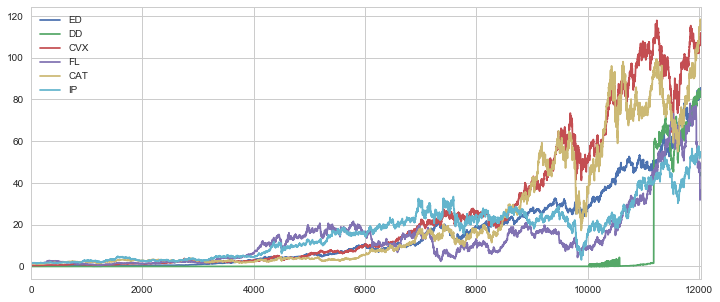

In [285]:
stock_data['ED'].plot(legend=True,figsize=(12,5))
stock_data['DD'].plot(legend=True,figsize=(12,5))
stock_data['CVX'].plot(legend=True,figsize=(12,5))
stock_data['FL'].plot(legend=True,figsize=(12,5))
stock_data['CAT'].plot(legend=True,figsize=(12,5))
stock_data['IP'].plot(legend=True,figsize=(12,5))

In [286]:
#stock_data.head()

In [287]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format = '%Y-%m-%d',  errors='coerce')

In [288]:
#allstocks_mean = stock_data.mean(axis=1)
#allstocks_sum = stock_data.sum(axis=1)

In [289]:
stock_data['year'], stock_data['month'], stock_data['day'], stock_data['day_name'], stock_data['decade'], stock_data['quarter']= stock_data['Date'].dt.year, stock_data['Date'].dt.month, stock_data['Date'].dt.day, stock_data['Date'].dt.weekday_name, (stock_data['Date'].dt.year // 10) * 10, stock_data['Date'].dt.quarter
stock_data['avg_all']=stock_data.loc[:,'ED':'BTU'].mean(axis=1)
stock_data['sum_all']=stock_data.loc[:,'ED':'BTU'].sum(axis=1)
stock_data['count_all']=stock_data.loc[:,'ED':'BTU'].count(axis=1)
stock_data['min_all']=stock_data.loc[:,'ED':'BTU'].min(axis=1)
stock_data['max_all']=stock_data.loc[:,'ED':'BTU'].max(axis=1)
#stock_data.head()

In [290]:
#stock_data['Quarter'].value_counts()
#stock_data.head()
#stock_data['year'].unique()
#stock_data['decade'].unique()
#stock_data.set_index(['Date'])

In [291]:
stock_data.head()

,Date,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,month,day,day_name,decade,quarter,avg_all,sum_all,count_all,min_all,max_all
0,1970-01-02,0.307997,0.000480,0.582503,1.857836,1.475225,1.808415,NaN,NaN,NaN,...,1,2,Friday,1970,1,1.005409,6.032456,6,0.000480,1.857836
1,1970-01-05,0.320831,0.000481,0.585290,1.839623,1.470783,1.873423,NaN,NaN,NaN,...,1,5,Monday,1970,1,1.015072,6.090431,6,0.000481,1.873423
2,1970-01-06,0.316553,0.000477,0.576929,1.845694,1.435234,1.855694,NaN,NaN,NaN,...,1,6,Tuesday,1970,1,1.005097,6.030581,6,0.000477,1.855694
3,1970-01-07,0.312275,0.000475,0.575535,1.809266,1.390800,1.814324,NaN,NaN,NaN,...,1,7,Wednesday,1970,1,0.983779,5.902675,6,0.000475,1.814324
4,1970-01-08,0.312275,0.000469,0.586683,1.821408,1.395244,1.832054,NaN,NaN,NaN,...,1,8,Thursday,1970,1,0.991356,5.948133,6,0.000469,1.832054


Data Aggregation
==================


Decade


In [292]:
decade_groupby = stock_data['count_all'].groupby(stock_data['decade']).count()
decade_groupby

decade
1970    2526
1980    2528
1990    2528
2000    2515
2010    1935
Name: count_all, dtype: int64

In [293]:
decade_groupby = stock_data['avg_all'].groupby(stock_data['decade']).mean()
decade_groupby

decade
1970     1.153397
1980     3.869789
1990    12.231429
2000    26.804857
2010    36.955809
Name: avg_all, dtype: float64

In [294]:
decade_groupby = stock_data['avg_all'].groupby(stock_data['decade']).std()
decade_groupby

decade
1970    0.262065
1980    1.466351
1990    6.242114
2000    6.598660
2010    7.254714
Name: avg_all, dtype: float64

In [295]:
decade_groupby = stock_data['sum_all'].groupby(stock_data['decade']).sum()
decade_groupby

decade
1970    4.105849e+04
1980    1.180551e+06
1990    8.166265e+06
2000    2.892271e+07
2010    4.533363e+07
Name: sum_all, dtype: float64

In [296]:
decade_groupby = stock_data.groupby(['decade'],as_index=False).mean()
decade_groupby

,decade,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,BTU,year,month,day,quarter,avg_all,sum_all,count_all,min_all,max_all
0,1970,0.352109,0.000740,1.020324,1.598647,2.352759,2.626871,0.530164,0.328255,0.987046,...,NaN,1974.498416,6.520190,15.733571,2.507126,1.153397,16.254350,13.503167,0.000740,4.450157
1,1980,2.678862,0.001926,3.127509,7.095895,2.938905,6.042379,1.342773,1.426453,2.642840,...,NaN,1984.498022,6.526503,15.750000,2.508703,3.869789,466.990055,111.377373,0.001926,55.839138
2,1990,10.413444,0.009797,12.970073,13.803549,8.706384,19.858152,3.739048,7.319875,17.578816,...,NaN,1994.496440,6.534019,15.732595,2.511472,12.231429,3230.326502,238.433940,0.009797,498.069258
3,2000,23.364301,0.025670,37.314016,12.071778,31.714613,21.895021,15.746605,8.820526,36.952690,...,NaN,2004.505368,6.539563,15.758250,2.513718,26.804857,11500.082847,424.601988,0.024323,1575.360332
4,2010,52.934095,28.926672,89.806580,39.813036,78.129784,35.531290,28.072260,11.544702,52.088846,...,26.099459,2013.358656,6.385013,15.688889,2.461499,36.955809,23428.232969,623.061499,0.704015,2477.524548


In [297]:
decade_groupby = stock_data.groupby(['decade'],as_index=False).sum()
decade_groupby

,decade,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,BTU,year,month,day,quarter,avg_all,sum_all,count_all,min_all,max_all
0,1970,889.427752,1.869261,2577.338799,4038.181721,5943.069871,6635.475938,1014.734463,628.279555,1889.205506,...,NaN,4987583,16470,39743,6333,2913.479581,4.105849e+04,34109,1.869261,1.124110e+04
1,1980,6772.162647,4.869409,7906.341970,17938.423150,7429.551394,15275.135068,3394.528948,3606.072126,6681.100597,...,NaN,5016811,16499,39816,6342,9782.826981,1.180551e+06,281562,4.869409,1.411613e+05
2,1990,26325.186399,24.767405,32788.343404,34895.372879,22009.738866,50201.408491,9452.313043,18504.642772,44439.247957,...,NaN,5042087,16518,39772,6349,30921.051973,8.166265e+06,602761,24.767405,1.259119e+06
3,2000,58761.215997,64.559143,93844.750903,30360.522285,79762.251803,55065.977837,39602.711400,22183.621964,92936.015090,...,NaN,5041331,16447,39632,6322,67414.215170,2.892271e+07,1067874,61.171926,3.962031e+06
4,2010,102427.473049,55944.183729,173775.731559,77038.224544,151181.132681,68753.046671,54319.822394,22338.998569,100791.916852,...,2897.039995,3895849,12355,30358,4763,71509.491219,4.533363e+07,1205624,1362.268193,4.794010e+06


Day of Week

In [298]:
dayname_groupby = stock_data['count_all'].groupby(stock_data['day_name']).count()
dayname_groupby

day_name
Friday       2403
Monday       2284
Thursday     2417
Tuesday      2461
Wednesday    2467
Name: count_all, dtype: int64

In [299]:
dayname_groupby = stock_data['avg_all'].groupby(stock_data['day_name']).mean()
dayname_groupby

day_name
Friday       15.200417
Monday       15.032962
Thursday     15.227783
Tuesday      15.186721
Wednesday    15.200285
Name: avg_all, dtype: float64

In [300]:
dayname_groupby = stock_data['avg_all'].groupby(stock_data['day_name']).std()
dayname_groupby

day_name
Friday       14.190825
Monday       14.131008
Thursday     14.191043
Tuesday      14.159567
Wednesday    14.177512
Name: avg_all, dtype: float64

In [301]:
dayname_groupby = stock_data.groupby(['day_name'],as_index=False).mean()
dayname_groupby

,day_name,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,year,month,day,decade,quarter,avg_all,sum_all,count_all,min_all,max_all
0,Friday,16.259467,4.622331,25.908137,13.650557,22.199933,16.316085,9.461371,5.864960,21.594573,...,1993.343321,6.530171,15.799001,1989.026217,2.508115,15.200417,6970.099027,265.600499,0.118675,845.955819
1,Monday,16.039216,4.578967,25.548371,13.563029,21.860978,16.161632,9.318326,5.853162,21.434803,...,1993.187391,6.612960,15.741681,1988.883538,2.540718,15.032962,6871.392156,263.323993,0.121456,838.504818
2,Thursday,16.279809,4.683253,25.930978,13.686562,22.221530,16.324359,9.479389,5.910027,21.668728,...,1993.371121,6.409185,15.581299,1989.052544,2.470004,15.227783,6982.315429,265.900290,0.123295,849.617860
3,Tuesday,16.251598,4.683863,25.877873,13.679793,22.162843,16.307207,9.449413,5.910150,21.647851,...,1993.355953,6.489232,15.781390,1989.036977,2.496140,15.186721,6959.690481,265.751321,0.121528,845.394737
4,Wednesday,16.265470,4.715299,25.910886,13.678186,22.211852,16.304140,9.474902,5.907858,21.671039,...,1993.348196,6.498581,15.769761,1989.027158,2.499392,15.200285,6970.714060,265.733685,0.119693,845.376208


In [302]:
dayname_groupby = stock_data.groupby(['day_name'],as_index=False).sum()
dayname_groupby

,day_name,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,year,month,day,decade,quarter,avg_all,sum_all,count_all,min_all,max_all
0,Friday,39071.499378,11102.837964,62257.252291,32802.288613,53346.438228,39207.552178,21609.772196,13395.569494,49322.004038,...,4790004,15692,37965,4779630,6027,36526.602138,1.674915e+07,638238,285.175699,2.032832e+06
1,Monday,36633.570434,10458.361047,58352.478762,30977.958579,49930.473504,36913.166924,20183.495185,12677.948739,46427.783639,...,4552440,15104,35954,4542610,5803,34335.286006,1.569426e+07,601432,277.404660,1.915145e+06
2,Thursday,39348.299022,11319.421646,62675.172669,33080.420146,53709.437865,39455.976191,21745.718105,13557.600985,49708.062086,...,4817978,15491,37660,4807540,5970,36805.551659,1.687626e+07,642681,298.003428,2.053526e+06
3,Tuesday,39995.181723,11526.985797,63685.446673,33665.971715,54542.756578,40132.035722,22064.380267,13800.200936,50547.732972,...,4905649,15970,38838,4895020,6143,37374.520911,1.712780e+07,654014,299.080952,2.080516e+06
4,Wednesday,40126.915287,11632.642493,63922.156240,33744.085526,54796.638440,40222.312990,22180.744495,13830.294832,50731.903267,...,4917590,16032,38904,4906930,6166,37499.104209,1.719675e+07,655565,295.281455,2.085543e+06


Quarter

In [303]:
quarter_groupby = stock_data['count_all'].groupby(stock_data['quarter']).count()
quarter_groupby

quarter
1    2970
2    3036
3    3037
4    2989
Name: count_all, dtype: int64

In [304]:
quarter_groupby = stock_data['avg_all'].groupby(stock_data['quarter']).mean()
quarter_groupby

quarter
1    15.190585
2    15.488359
3    15.262576
4    14.737345
Name: avg_all, dtype: float64

In [305]:
quarter_groupby = stock_data['sum_all'].groupby(stock_data['quarter']).sum()
quarter_groupby

quarter
1    2.044990e+07
2    2.169745e+07
3    2.146719e+07
4    2.002968e+07
Name: sum_all, dtype: float64

In [306]:
quarter_groupby = stock_data.groupby(['quarter'],as_index=False).sum()
quarter_groupby

,quarter,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,BTU,year,month,day,decade,avg_all,sum_all,count_all,min_all,max_all
0,1,47245.235200,12608.239875,74550.822360,39952.108607,64245.670319,47862.559257,26456.054099,16413.596132,59682.097888,...,NaN,5920429,5993,46509,5907570,45116.038811,2.044990e+07,776337,344.760663,2.545564e+06
1,2,49837.274832,15653.949588,80484.491164,42675.086842,69933.844650,50178.597474,27180.843437,17583.362114,62971.795079,...,1563.820001,6052218,15217,47158,6039060,47022.657738,2.169745e+07,810409,409.567361,2.647702e+06
2,3,50469.272445,15211.621963,79972.968981,41900.433831,68977.645267,50407.002460,27455.068133,17061.467682,63359.830493,...,1333.219994,6053908,24244,49185,6040780,46352.443840,2.146719e+07,814545,374.267893,2.579539e+06
3,4,47623.683367,12566.437521,75884.224130,39743.095299,63168.584379,47482.884814,26692.144579,16203.189058,60723.762542,...,NaN,5957106,32835,46469,5944320,44049.924535,2.002968e+07,790639,326.350277,2.394758e+06


In [307]:
quarter_groupby = stock_data.groupby(['quarter'],as_index=False).mean()
quarter_groupby

,quarter,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,BTU,year,month,day,decade,avg_all,sum_all,count_all,min_all,max_all
0,1,15.907487,4.245199,25.101287,13.451888,21.631539,16.115340,9.502893,5.895688,21.437535,...,NaN,1993.410438,2.017845,15.659596,1989.080808,15.190585,6885.486910,261.392929,0.116081,857.092382
1,2,16.415440,5.156110,26.510043,14.056353,23.034863,16.527865,9.483895,6.135158,21.972015,...,24.822540,1993.484190,5.012187,15.532938,1989.150198,15.488359,7146.721172,266.933136,0.134904,872.102213
2,3,16.618134,5.010416,26.332884,13.796653,22.712428,16.597630,9.437975,5.865063,21.780622,...,27.775417,1993.384261,7.982878,16.195258,1989.061574,15.262576,7068.550715,268.207112,0.123236,849.370597
3,4,15.932982,4.204228,25.387830,13.296452,21.133685,15.885876,9.329656,5.663470,21.224664,...,NaN,1993.009702,10.985279,15.546671,1988.732017,14.737345,6701.132076,264.516226,0.109184,801.190218


Years

In [308]:
years_groupby = stock_data['count_all'].groupby(stock_data['year']).count()
years_groupby.head(),years_groupby.tail()

(year
 1970    254
 1971    253
 1972    251
 1973    252
 1974    253
 Name: count_all, dtype: int64, year
 2013    252
 2014    252
 2015    252
 2016    252
 2017    173
 Name: count_all, dtype: int64)

In [309]:
years_groupby = stock_data['sum_all'].groupby(stock_data['year']).sum()
years_groupby.head(),years_groupby.tail()

(year
 1970    1379.952001
 1971    1763.375802
 1972    2389.499695
 1973    3100.096301
 1974    2769.259275
 Name: sum_all, dtype: float64, year
 2013    6.319880e+06
 2014    7.517666e+06
 2015    7.172572e+06
 2016    6.883239e+06
 2017    5.480170e+06
 Name: sum_all, dtype: float64)

In [310]:
years_groupby = stock_data['avg_all'].groupby(stock_data['year']).mean()
years_groupby.head(),years_groupby.tail()

(year
 1970    0.905480
 1971    1.161644
 1972    1.146690
 1973    0.988732
 1974    0.759986
 Name: avg_all, dtype: float64, year
 2013    40.881393
 2014    45.712072
 2015    41.401916
 2016    38.747579
 2017    44.783624
 Name: avg_all, dtype: float64)

In [311]:
years_groupby = stock_data.groupby(['year'],as_index=False).sum()
years_groupby.head()

,year,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,BTU,month,day,decade,quarter,avg_all,sum_all,count_all,min_all,max_all
0,1970,73.756515,0.132184,133.878837,416.772719,333.481009,421.930737,NaN,NaN,NaN,...,NaN,1662,3982,500380,639,229.992000,1379.952001,1524,0.132184,429.232403
1,1971,82.246718,0.173462,172.500161,625.196432,436.219098,447.039931,NaN,NaN,NaN,...,NaN,1660,3961,498410,636,293.895967,1763.375802,1518,0.173462,625.196432
2,1972,84.494968,0.208493,206.626735,501.109116,521.221200,489.155099,74.637154,49.386021,167.757435,...,NaN,1621,3942,494470,624,287.819309,2389.499695,2090,0.208493,558.823614
3,1973,82.444191,0.219412,246.943885,311.706354,574.240476,570.456033,140.694222,75.771676,325.586422,...,NaN,1644,3970,496440,633,249.160483,3100.096301,3192,0.219412,601.367390
4,1974,43.438449,0.188930,187.937268,209.935105,497.750894,644.647891,122.356975,59.989667,281.065280,...,NaN,1649,3982,498410,636,192.276475,2769.259275,3652,0.188930,644.647891


In [312]:
years_groupby = stock_data.groupby(['year'],as_index=False).mean()
years_groupby.head()

,year,ED,DD,CVX,FL,CAT,IP,SJW,F,LLY,...,BTU,month,day,decade,quarter,avg_all,sum_all,count_all,min_all,max_all
0,1970,0.290380,0.000520,0.527082,1.640837,1.312917,1.661145,NaN,NaN,NaN,...,NaN,6.543307,15.677165,1970.0,2.515748,0.905480,5.432882,6.000000,0.000520,1.689891
1,1971,0.325086,0.000686,0.681819,2.471132,1.724186,1.766956,NaN,NaN,NaN,...,NaN,6.561265,15.656126,1970.0,2.513834,1.161644,6.969865,6.000000,0.000686,2.471132
2,1972,0.336633,0.000831,0.823214,1.996451,2.076578,1.948825,0.511213,0.338260,1.149024,...,NaN,6.458167,15.705179,1970.0,2.486056,1.146690,9.519919,8.326693,0.000831,2.226389
3,1973,0.327159,0.000871,0.979936,1.236930,2.278732,2.263714,0.558310,0.300681,1.292010,...,NaN,6.523810,15.753968,1970.0,2.511905,0.988732,12.301969,12.666667,0.000871,2.386379
4,1974,0.171693,0.000747,0.742835,0.829783,1.967395,2.548015,0.483624,0.237113,1.110930,...,NaN,6.517787,15.739130,1970.0,2.513834,0.759986,10.945689,14.434783,0.000747,2.548015


Year by Quarter

In [313]:
Year_Quarter = stock_data['count_all'].groupby([stock_data['year'],stock_data['quarter']]).count()
Year_Quarter[:20]

year  quarter
1970  1          61
      2          65
      3          64
      4          64
1971  1          62
      2          63
      3          64
      4          64
1972  1          63
      2          64
      3          63
      4          61
1973  1          62
      2          63
      3          63
      4          64
1974  1          62
      2          63
      3          64
      4          64
Name: count_all, dtype: int64

In [314]:
Year_Quarter = stock_data['sum_all'].groupby([stock_data['year'],stock_data['quarter']]).sum()
Year_Quarter[:20]

year  quarter
1970  1          344.662873
      2          338.682359
      3          336.259332
      4          360.347437
1971  1          416.947527
      2          463.053436
      3          451.724650
      4          431.650189
1972  1          435.656070
      2          534.623153
      3          704.149110
      4          715.071362
1973  1          721.347561
      2          771.114743
      3          798.218396
      4          809.415601
1974  1          722.668397
      2          698.862209
      3          687.724639
      4          660.004030
Name: sum_all, dtype: float64

In [315]:
Year_Quarter = stock_data['avg_all'].groupby([stock_data['year'],stock_data['quarter']]).mean()
Year_Quarter[:20]

year  quarter
1970  1          0.941702
      2          0.868416
      3          0.875675
      4          0.938405
1971  1          1.120827
      2          1.225009
      3          1.176366
      4          1.124089
1972  1          1.152529
      2          1.145124
      3          1.117697
      4          1.172248
1973  1          1.163464
      2          0.987218
      3          0.905010
      4          0.903366
1974  1          0.832567
      2          0.792361
      3          0.730286
      4          0.687504
Name: avg_all, dtype: float64

Descriptive Statistics Plots
=============================

Average Yearly Quarterly Closing

In [316]:
Year_Quarter_avg = stock_data['avg_all'].groupby([stock_data['year'],stock_data['quarter']]).mean()
Year_Quarter_std = stock_data['avg_all'].groupby([stock_data['year'],stock_data['quarter']]).std()
Year_Quarter_lb=Year_Quarter_avg-1.96*(Year_Quarter_std)
Year_Quarter_ub=Year_Quarter_avg+1.96*(Year_Quarter_std)

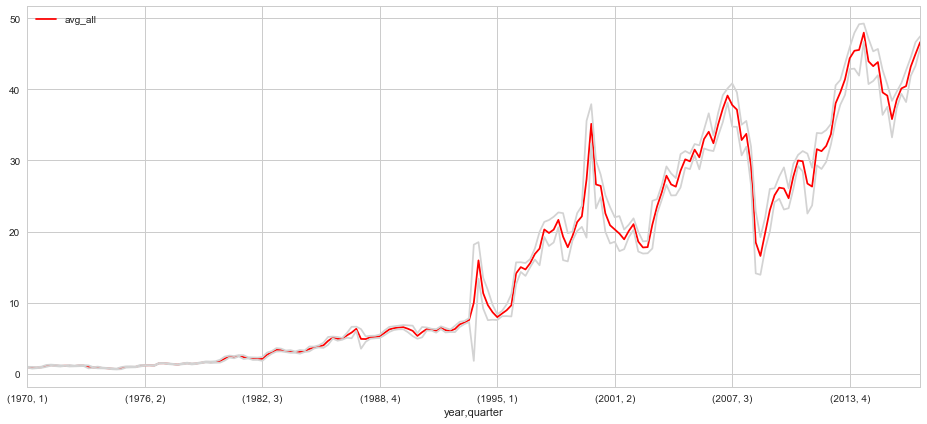

In [317]:
Year_Quarter_avg.plot(legend=True,figsize=(16,7),color='red')
Year_Quarter_lb.plot(figsize=(16,7),color='lightgrey')
Year_Quarter_ub.plot(figsize=(16,7),color='lightgrey')

Yearly Closing

In [318]:
years_groupby_avg = stock_data['avg_all'].groupby(stock_data['year']).mean()
years_groupby_std = stock_data['avg_all'].groupby(stock_data['year']).std()
years_groupby_lb=years_groupby_avg-1.96*(years_groupby_std)
years_groupby_ub=years_groupby_avg+1.96*(years_groupby_std)

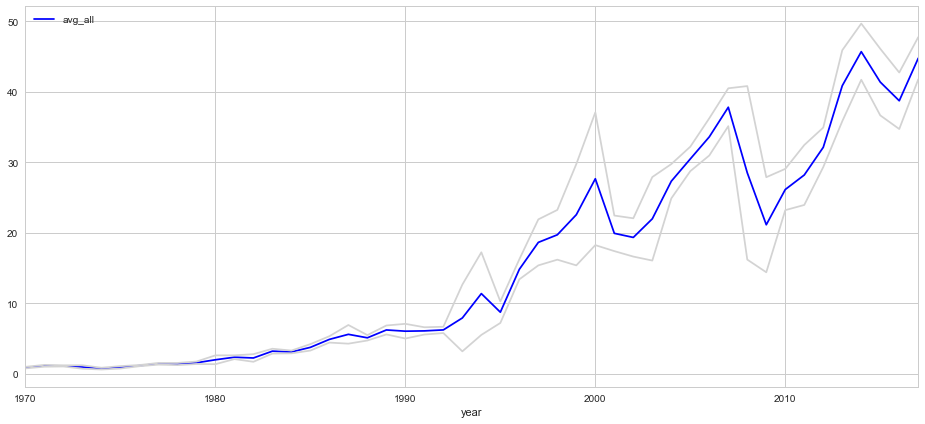

In [319]:
years_groupby_avg.plot(legend=True,figsize=(16,7),color='blue')
years_groupby_lb.plot(figsize=(16,7),color='lightgrey')
years_groupby_ub.plot(figsize=(16,7),color='lightgrey')

Before and After Y2K
=======================

Years leading up to Y2k and after

In [320]:
y2k_groupby_avg = stock_data[stock_data['year']>1995].groupby([stock_data['year'],stock_data['quarter']]).mean()
y2k_groupby_avg

ED         DD         CVX         FL         CAT  \
year quarter                                                            
1996 1        10.971351   0.010114   13.136311   8.835209    9.340255   
     2         9.829155   0.010648   14.174684  13.726105    9.538915   
     3         9.521935   0.010874   14.606068  14.412051   10.115214   
     4        10.224803   0.012556   16.205661  15.476761   10.842223   
1997 1        10.986776   0.014536   16.721237  14.612565   11.501125   
     2        10.553425   0.014775   17.499672  15.721685   13.843997   
     3        11.704111   0.017441   20.092728  17.241158   16.748139   
     4        13.761135   0.016250   20.788113  14.239322   15.340887   
1998 1        16.390424   0.016742   20.288554  15.791934   15.302223   
     2        17.310004   0.020849   21.248353  14.948573   16.589710   
     3        17.949129   0.017058   21.112057   8.975145   14.546961   
     4        20.532726   0.016063   21.820637   5.666986   14.118821   
1999 1        19.372909   0.015336   21.430787   3.843921   14.179651   
     2        18.767276   0.019111   25.138400   6.747386   18.201135   
     3        17.916827   0.019346   25.145034   6.300211   18.188557   
     4        15.077211   0.017830   24.061090   5.026675   15.894044   
2000 1        12.981392   0.016198   22.322254   4.651337   12.909221   
     2        13.951286   0.014594   24.603846   7.593893   12.189085   
     3        14.055760   0.012953   23.242220   9.675548   11.563298   
     4        15.634581   0.012687   23.057883   9.452098   12.044719   
2001 1        15.944462   0.012904   23.881920   8.734528   14.150615   
     2        17.369344   0.013675   26.594188   9.623346   16.746534   
     3        18.739499   0.012432   25.396306  11.371755   16.691987   
     4        18.566228   0.012698   25.019163  10.780430   15.980729   
2002 1        19.576520   0.013717   25.022524  10.925090   17.687307   
     2        20.584043   0.013937   25.483335  10.493808   17.736148   
     3        19.576326   0.012582   22.198616   7.473431   14.484910   
     4        20.670686   0.013046   20.476058   7.527624   14.677636   
2003 1        19.980620   0.012263   19.588443   7.186433   15.856198   
     2        20.766523   0.013296   20.779226   8.291474   18.425289   
...                 ...        ...         ...        ...         ...   
2010 2        32.497795   0.808907   58.342364  12.454273   52.100882   
     3        35.080188   0.779287   58.460596  11.412554   56.811563   
     4        37.113043   0.824834   66.093230  15.052254   69.676500   
2011 1        38.102512   0.581043   77.123021  16.542079   83.126186   
     2        40.403591   0.603925   81.630732  19.751899   87.621933   
     3        42.803138   1.155493   78.896151  18.599813   76.791927   
     4        46.358220   0.799044   81.680625  20.194572   75.290031   
2012 1        46.777828   0.229072   86.854236  25.122201   91.876686   
     2        48.313706   0.255331   83.078190  27.525024   80.253261   
     3        50.558667   0.325433   91.457109  31.192557   73.460478   
     4        47.182919   0.396506   90.326012  31.266775   73.356131   
2013 1        47.906026   0.553703   96.796631  30.955685   80.455131   
     2        50.482463   0.827959  101.646382  31.883846   73.750055   
     3        48.956495   0.960345  104.208021  32.267830   73.856940   
     4        48.302279   1.146587  103.340362  34.249876   75.083532   
2014 1        47.089343   1.472480  100.310038  39.048479   83.498798   
     2        49.041678  37.591864  108.226160  45.203179   93.482504   
     3        50.430641  58.543595  111.926259  49.941436   94.995078   
     4        56.314561  62.561652  100.536279  52.914696   87.876636   
2015 1        58.844611  67.214766   95.382335  54.284028   75.636909   
     2        55.226672  63.842748   94.735663  59.960217   78.914857   
     3        58.487536  50.939909   76.771791  68.666202   70.825492   
     4

In [321]:
y2k_groupby_avg = stock_data['avg_all'][stock_data['year']>1994].groupby([stock_data['year'],stock_data['quarter']]).mean()
y2k_groupby_avg[:37]

year  quarter
1995  1           7.974578
      2           8.475514
      3           8.949710
      4           9.648376
1996  1          14.128519
      2          15.008089
      3          14.677124
      4          15.561143
1997  1          16.852897
      2          17.616159
      3          20.303961
      4          19.802681
1998  1          20.274808
      2          21.648734
      3          19.290510
      4          17.799722
1999  1          19.356728
      2          21.337506
      3          22.141062
      4          27.356217
2000  1          35.148058
      2          26.624022
      3          26.420917
      4          22.560005
2001  1          20.889541
      2          20.297354
      3          19.713246
      4          18.909969
2002  1          20.100990
      2          21.046889
      3          18.595799
      4          17.768067
2003  1          17.819719
      2          20.972736
      3          23.533159
      4          25.494832
2004  1       

In [322]:
y2k_groupby_avg = stock_data['avg_all'][stock_data['year']>1990].groupby(stock_data['year']).mean()
y2k_groupby_std = stock_data['avg_all'][stock_data['year']>1990].groupby(stock_data['year']).std()
y2k_groupby_lb=y2k_groupby_avg-1.96*(y2k_groupby_std)
y2k_groupby_ub=y2k_groupby_avg+1.96*(y2k_groupby_std)

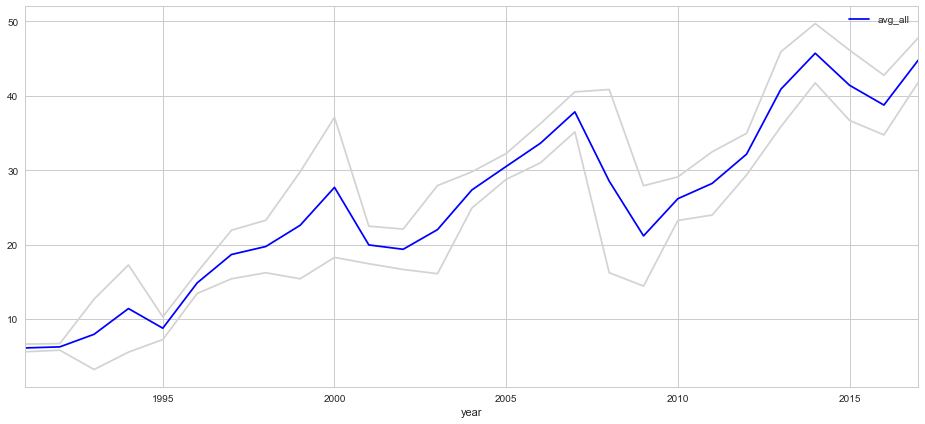

In [323]:
y2k_groupby_avg.plot(legend=True,figsize=(16,7),color='blue')
y2k_groupby_lb.plot(figsize=(16,7),color='lightgrey')
y2k_groupby_ub.plot(figsize=(16,7),color='lightgrey')

Min

In [324]:
y2k_data_min=stock_data[stock_data['year']>1990].copy()
y2k_data_max=stock_data[stock_data['year']>1990].copy()

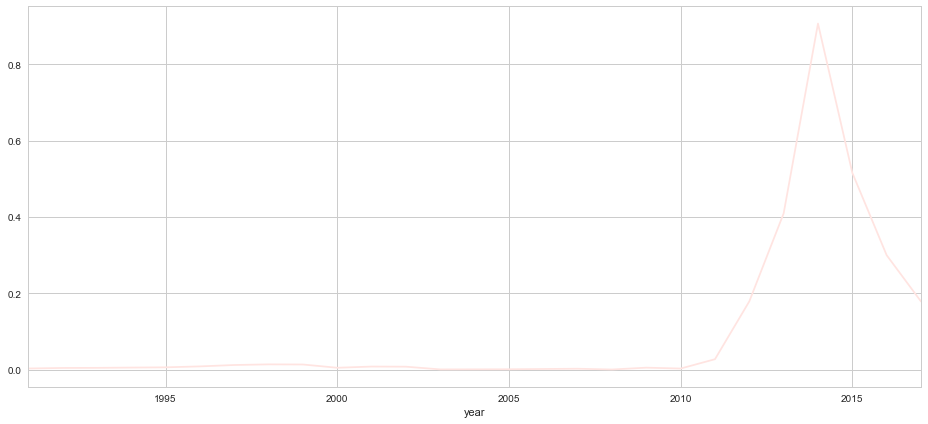

In [325]:
y2k_groupby_min=y2k_data_min['min_all'].groupby(y2k_data_min['year']).min()
y2k_groupby_min.plot(figsize=(16,7),color='mistyrose')

In [326]:
y2k_data_min=y2k_data_min.loc[:,'Date':'BTU'].copy()
y2k_data_min['year']=y2k_data_min['Date'].dt.year
y2k_data_min['min_all']=y2k_data_min.loc[:,'ED':'BTU'].min(axis=1)
y2k_data_min['year']=y2k_data_min['Date'].dt.year
y2k_data_min_gb=y2k_data_min.groupby(y2k_data_min['year']).min()
value_list =y2k_data_min_gb['min_all']
#y2k_data_min_gb


In [327]:
minimum=y2k_data_min_gb[y2k_data_min_gb.isin(value_list)]
minimum.dropna(axis=1,how='all')

,DD,MUX,SUN,HMY,CETV,BST,CTAA,SB,ELJ,min_all
year,,,,,,,,,,
1991,0.003621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003621
1992,0.005015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005015
1993,0.005292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005292
1994,0.006035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006035
1995,0.006687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006687
1996,0.009122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009122
1997,0.012756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012756
1998,0.014415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014415
1999,0.014089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014089


Max

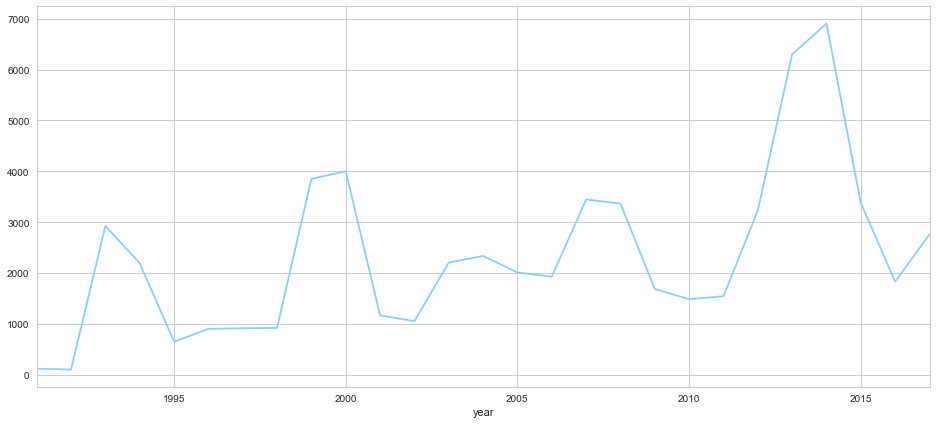

In [328]:
y2k_groupby_max=y2k_data_max['max_all'].groupby(y2k_data_max['year']).max()
y2k_groupby_max.plot(figsize=(16,7),color='lightskyblue')

In [330]:
y2k_data_max=y2k_data_max.loc[:,'Date':'BTU'].copy()
y2k_data_max['year']=y2k_data_max['Date'].dt.year
y2k_data_max['max_all']=y2k_data_max.loc[:,'ED':'BTU'].max(axis=1)
y2k_data_max['year']=y2k_data_max['Date'].dt.year
y2k_data_max_gb=y2k_data_max.groupby(y2k_data_min['year']).max()
value_list =y2k_data_max_gb['max_all']

In [331]:
maximum=y2k_data_max_gb[y2k_data_max_gb.isin(value_list)]
maximum.dropna(axis=1,how='all')

,GHC,NVR,AVNW,ARWR,FTAI,EMITF,FBC,ACTA,BCEI,max_all
year,,,,,,,,,,
1991,NaN,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,120.000000
1992,103.203735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.203735
1993,NaN,NaN,NaN,2925.00,NaN,NaN,NaN,NaN,NaN,2925.000000
1994,NaN,NaN,NaN,2193.75,NaN,NaN,NaN,NaN,NaN,2193.750000
1995,NaN,NaN,NaN,650.00,NaN,NaN,NaN,NaN,NaN,650.000000
1996,NaN,NaN,NaN,NaN,900.859131,NaN,NaN,NaN,NaN,900.859131
1997,NaN,NaN,NaN,NaN,914.031433,NaN,NaN,NaN,NaN,914.031433
1998,NaN,NaN,NaN,NaN,921.179871,NaN,NaN,NaN,NaN,921.179871
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3850.0,NaN,3850.000000


Specific Stocks
===============